In [1]:
import pandas
import numpy

from matplotlib import pyplot

from sklearn import metrics, svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

from src.api.data import LoadDataStore
from src.utils.confusion_matrix import make_confusion_matrix

In [2]:
numpy.random.seed(2)

In [3]:
train = LoadDataStore.get_train(var_set_type=1)
x_train = train.drop(["default_ind", "issue_d"], axis=1)
y_train = train[["default_ind"]].values.ravel()

In [4]:
test = LoadDataStore.get_test(var_set_type=1)
x_test = test.drop(["default_ind", "issue_d"], axis=1)
y_test = test[["default_ind"]].values.ravel()

Model

In [5]:
model = svm.LinearSVC(max_iter=100)
model.fit(x_train, y_train)

/home/admin-12/Documents/IMARTICUS/dsp30-project/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(max_iter=100)

In [6]:
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[254194   2486]
 [    66    245]]


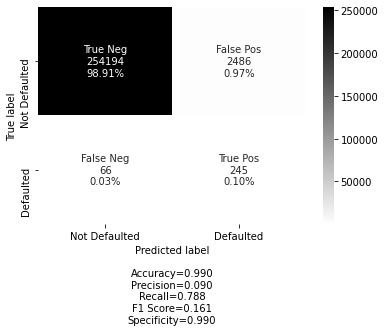

In [7]:
from src.utils.confusion_matrix import make_confusion_matrix

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Not Defaulted', 'Defaulted']

make_confusion_matrix(conf_matrix, group_names=labels, categories=categories, cmap='binary')